In [2380]:
import pickle
from functools import partial
from os import listdir
from os.path import isfile, join

import numpy as np
import scipy
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

from common import CityResult
from file_name_generator import generate_new_name


Загрузка данных

In [2381]:
mypath = '../clusters_results/ekb_var'
mypath = '../clusters_results/synt'
mypath = '../clusters_results/2024_05_17_var'
mypath = '../clusters_results/2024_05_18_synt'

mypath = '../clusters_results/synt2'

mypath = '../clusters_results/ekb2'
mypath = '../clusters_results/synt3'

mypath = '../clusters_results/t'

# mypath = '../clusters_results/2024_05_21'

# mypath = '../clusters_results/synt4'
# mypath = '../clusters_results/synt5'

In [2382]:
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

r : dict[str:CityResult]= {}
for name in onlyfiles:
    with open(join(mypath, name), 'rb') as f:
        c: CityResult = pickle.load(f)
        if c.points_results[0].alpha > 0.35:
            r[name] = c
        f.close()

In [2383]:
for name in r:
    print(name)

SYNT_var_0.0503.pkl
SYNT_var_0.1003.pkl
SYNT_var_0.1503.pkl
SYNT_var_0.2003.pkl
SYNT_var_0.2503.pkl
SYNT_var_0.3002.pkl
SYNT_var_0.3499.pkl
SYNT_var_0.4002.pkl
SYNT_var_0.4502.pkl
SYNT_var_0.5005.pkl
SYNT_var_0.5505.pkl
SYNT_var_0.6005.pkl
SYNT_var_0.6506.pkl
SYNT_var_0.7007.pkl
SYNT_var_0.7504.pkl
SYNT_var_0.8004.pkl
SYNT_var_0.85.pkl
SYNT_var_0.8505.pkl
SYNT_var_0.855.pkl
SYNT_var_0.86.pkl
SYNT_var_0.865.pkl
SYNT_var_0.8699.pkl
SYNT_var_0.875.pkl
SYNT_var_0.88.pkl
SYNT_var_0.885.pkl
SYNT_var_0.89.pkl
SYNT_var_0.895.pkl
SYNT_var_0.9.pkl
SYNT_var_0.9005.pkl
SYNT_var_0.905.pkl
SYNT_var_0.9101.pkl
SYNT_var_0.9151.pkl
SYNT_var_0.92.pkl
SYNT_var_0.925.pkl
SYNT_var_0.93.pkl
SYNT_var_0.935.pkl
SYNT_var_0.9401.pkl
SYNT_var_0.945.pkl
SYNT_var_0.95.pkl
SYNT_var_0.9505.pkl
SYNT_var_0.9552.pkl
SYNT_var_0.9601.pkl
SYNT_var_0.9652.pkl
SYNT_var_0.9701.pkl
SYNT_var_0.9751.pkl
SYNT_var_0.9801.pkl
SYNT_var_0.985.pkl
SYNT_var_0.99.pkl
SYNT_var_0.995.pkl
SYNT_var_1.0.pkl


In [2384]:
mypath = '../clusters_results/2024_05_20'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
r = {}
for name in onlyfiles:
    with open(join(mypath, name), 'rb') as f:
        # r[name+'_1'] = pickle.load(f)
        f.close()

In [2385]:
mypath = '../clusters_results/2024_05_24'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
speedup_statistic = {}
for name in onlyfiles:
    with open(join(mypath, name), 'rb') as f:
        speedup_statistic[name+'_1'] = pickle.load(f)
        f.close()

In [2386]:
mypath = '../clusters_results/2024_05_24_rand_w_paths_0.2'
mypath = '../clusters_results/plain/2024_05_25_plain_points_add_n_0.2'

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
# speedup_statistic = {}
for name in onlyfiles:
    with open(join(mypath, name), 'rb') as f:
        r[name+'_2'] = pickle.load(f)
        f.close()

Обработка данных

In [2387]:
def theory_func(x, c, g, N = 9574, b0 = 1):
    x = x * c
    q = np.log(x) / np.log(N)
    # q = 0
    return g / (x / b0 * (1 + q) + 1 / (2 * np.sqrt(x * N)) * (1 - q))

In [2388]:
X_a = {}
Y_err = {}
Y_err_std = {}
Y_speedup = {}

for name in r:
    result: CityResult = r[name]
    X_a[name] = [a.alpha for a in result.points_results]
    Y_err[name] = [np.mean(a.errors) for a in result.points_results]
    Y_err_std[name] = [np.std(a.errors) for a in result.points_results]
    Y_speedup[name] = [np.mean(a.speed_up) for a in result.points_results]

Графики:

In [2389]:
print(len(r))

24


In [2390]:
# X_max = {}
# Y_speedup_max = {}
# Y_err_speedup = {}
#
# X_dens = {}
# d=[]
# b= []
#
# for name in r:
#     # if r[name].points_results[0].alpha < 0.3:
#     #     del r[name]
#     # fig, axs = plt.subplots(1, 2)
#     # fig.set_figwidth(25)
#     # fig.set_figheight(7)
#
#     # axs[0].errorbar(X_a[name], Y_speedup[name], fmt='o')
#     # axs[0].set(xlabel='alpha'+ str(r[name].density), ylabel='ускорение')
#     # print(r[name].points_results[0].alpha)
#     func_r = partial(theory_func, N=r[name].nodes, b0=r[name].density)
#     #
#     # _x = np.array(X_a[name])
#     # _x = _x[_x < 0.4]
#     # _xx = np.linspace(0, 1, 100)
#     #
#     #
#     # _y = np.array(Y_speedup[name])[0:len(_x)]
#     # popt = curve_fit(func_r, _x, _y, p0=[0.01, 2])
#     # func_target = partial(theory_func, c=popt[0][0], g=popt[0][1],N=r[name].nodes, b0=r[name].density)
#     # a = scipy.optimize.fminbound(lambda x: -func_target(x), 0, 0.5)
#     # X_max[name] = a
#     max_index = np.argmax(Y_speedup[name])
#
#     Y_speedup_max[name] = Y_speedup[name][max_index]
#     Y_err_speedup[name] = Y_err[name][max_index]
#     X_dens[name] = r[name].density
#     #
#     #
#     # _y = func_target(np.array(_xx))
#     # axs[0].errorbar(_xx, _y, linewidth=3)
#
#     # axs[1].errorbar(X_a[name], Y_err[name], fmt='o')
#     # axs[1].set(xlabel='alpha' + '\n Плотность:'+str(r[name].density), ylabel='средняя относительная ошибка')
#     # z = np.polyfit(X_a[name], Y_err[name], 4)
#     # p = np.poly1d(z)
#     # axs[1].errorbar(_xx, p(_xx), fmt='o')
#     # Y_err_speedup[name] = p(a)
#     #
#     # print('c={:.2f}'.format(popt[0][0]) +' b={:.2f}'.format(popt[0][1]))
#     # d.append(r[name].density)
#     # b.append(popt[0][1])
#
#     # axs[2].errorbar(X_a[name], Y_err_std[name], fmt='o')
#     # axs[2].set(xlabel='alpha'+ str(r[name].density), ylabel='погрешность ошибки')
#
#     # file_name = generate_new_name(name + '.png', 'plots')
#
#     # plt.savefig(file_name)

In [2391]:
print('alpha:',np.mean([r[name].points_results[0].alpha for name in r]),np.std([r[name].points_results[0].alpha for name in r]))

alpha: 0.2003125 0.0020249099774228606


Построим график ускорения от плотности

In [2392]:
def line(x,a,b):
    return a*x+b

In [2393]:
X_betta = np.array([r[n].density for n in r])

Y_betta_speedup =[np.mean(r[name].points_results[0].speed_up[0]) for name in r]
Y_betta_err =[np.mean(r[name].points_results[0].errors) for name in r]

Y_time = [r[name].points_results[0].absolute_time[0] for name in r]

Y_time_usual = [r[name].points_results[0].absolute_time[0] * r[name].points_results[0].speed_up[0]  for name in r]

Y_errors = np.array([r[name].points_results[0].errors[0:200] for name in r])

In [2394]:
indexes = np.argsort(X_betta)
X_betta = np.array(X_betta)[indexes]
Y_betta_speedup = np.array(Y_betta_speedup)[indexes]
Y_betta_err = np.array(Y_betta_err)[indexes]
Y_time = np.array(Y_time)[indexes]
Y_time_usual = np.array(Y_time_usual)[indexes]
Y_errors = Y_errors[indexes,:]

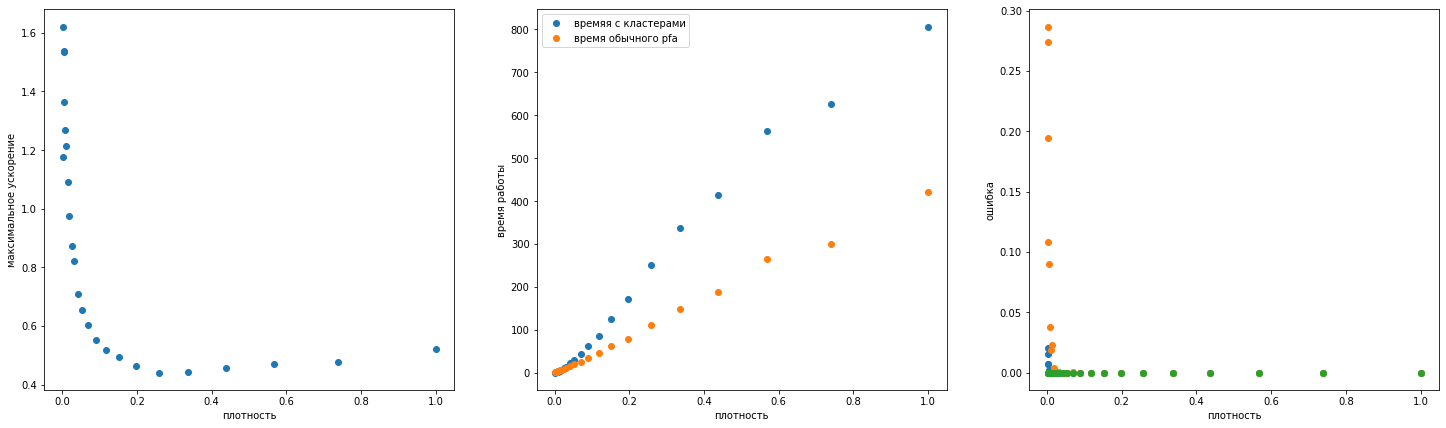

In [2395]:
fig, axs = plt.subplots(1, 3)
fig.set_figwidth(25)
fig.set_figheight(7)

axs[0].errorbar(X_betta, Y_betta_speedup, fmt='o')
axs[0].set(xlabel='плотность', ylabel='максимальное ускорение')
# b1 = axs[0].boxplot(data1, labels=labels)

axs[1].errorbar(X_betta, np.array(Y_time), fmt='o', label = 'времяя с кластерами')
axs[1].errorbar(X_betta, Y_time_usual, fmt='o', label = 'время обычного pfa')
axs[1].set(xlabel='плотность', ylabel='время работы')

axs[1].legend()
axs[2].errorbar([np.max(r[name].density)for name in r], [np.mean(r[name].points_results[0].errors )for name in r], fmt='o')
axs[2].set(xlabel='плотность', ylabel='ошибка')


axs[2].errorbar([np.min(r[name].density)for name in r], [np.max(r[name].points_results[0].errors )for name in r], fmt='o')
axs[2].set(xlabel='плотность', ylabel='ошибка')


axs[2].errorbar([np.mean(r[name].density)for name in r], [np.min(r[name].points_results[0].errors )for name in r], fmt='o')
axs[2].set(xlabel='плотность', ylabel='ошибка')

fig.patch.set_alpha(1)
plt.show()

['0.51 +- 0.00', '0.67 +- 0.05', '1.36 +- 0.06', '1.78 +- 0.07', '2.10 +- 0.11', '2.56 +- 0.10', '3.06 +- 0.12', '3.73 +- 0.19', '3.81 +- 0.20', '4.39 +- 0.22', '4.57 +- 0.14', '4.76 +- 0.19', '5.62 +- 0.35', '5.85 +- 0.24', '6.11 +- 0.32', '6.52 +- 0.36', '1.05 +- 0.02', '0.69 +- 0.00', '0.87 +- 0.00', '0.57 +- 0.00', '0.80 +- 0.00', '0.76 +- 0.00', '0.52 +- 0.00', '0.91 +- 0.00']


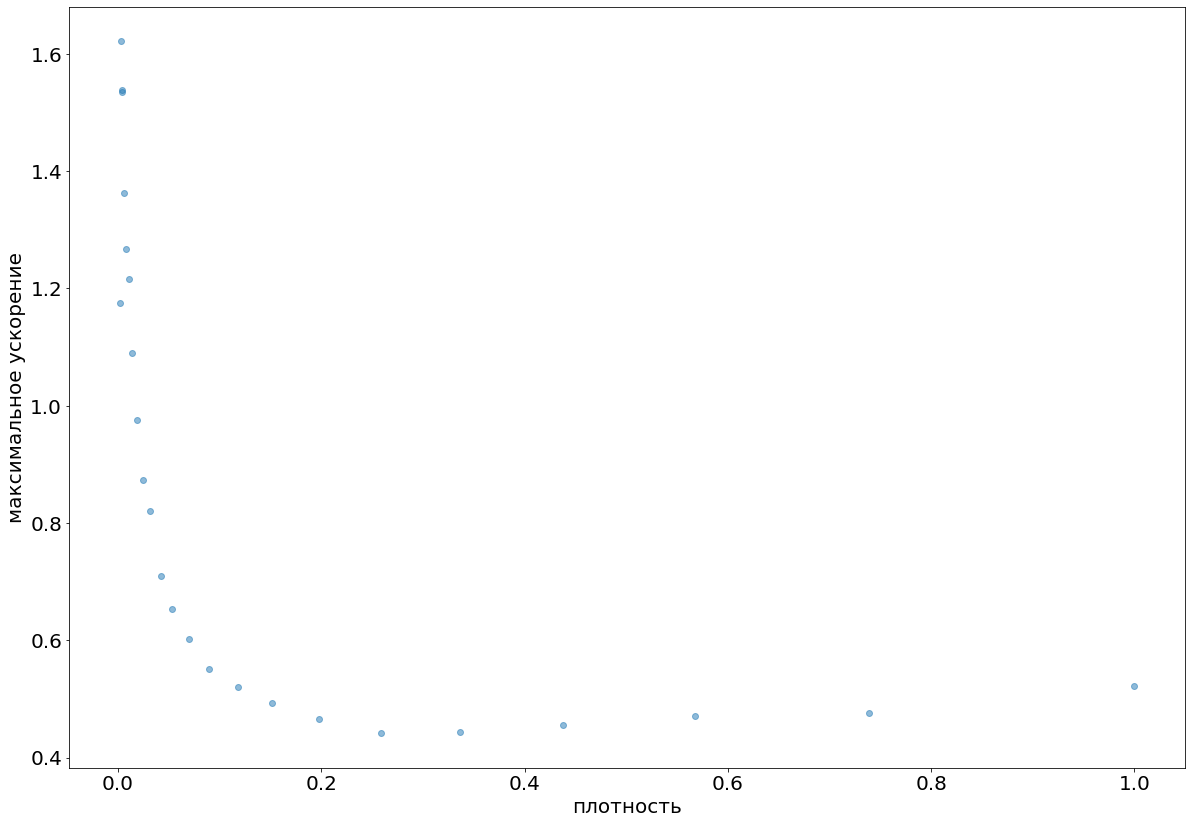

In [2396]:
plt.rcParams.update({'font.size': 20})
data = []
label = []
M = len(Y_betta_err)
STEP = 2
for i in range(0,M,STEP):
    data.append(Y_errors[i])
    label.append('{:.2f}'.format(X_betta[i]))
x = [i/STEP + 1 for i in  range(0,M, 1)]
fig, axs = plt.subplots(1, 1)
fig.set_figwidth(20)
fig.set_figheight(7*2)

data_speed_up = [[pr.speed_up[0] + 0.1 for pr in speedup_statistic[n].points_results] for n in speedup_statistic]
print(['{:.2f} +- {:.2f}'.format(np.mean(q), np.std(q)) for q in data_speed_up])
axs.errorbar(X_betta, Y_betta_speedup, fmt='o', alpha = 0.5)
# axs.boxplot(data_speed_up, labels = ['{:.2f}'.format(speedup_statistic[n].density) for n in speedup_statistic])
axs.set(xlabel='плотность', ylabel='максимальное ускорение')
# b1 = axs[0].boxplot(data1, labels=labels)

# axs.errorbar(X_betta, np.array(Y_time), fmt='o', label = 'время с кластерами')
# axs.errorbar(X_betta, Y_time_usual, fmt='o', label = 'время обычного pfa')
# axs.set(xlabel='плотность', ylabel='время работы')
#
# axs.legend()

# axs[2].set(xlabel='плотность', ylabel='ошибка')
# axs[2].errorbar(x,Y_betta_err[:M:1], fmt = 'o', alpha = 0.5)
# axs[2].boxplot(data, labels = label)

fig.patch.set_alpha(1)
plt.show()

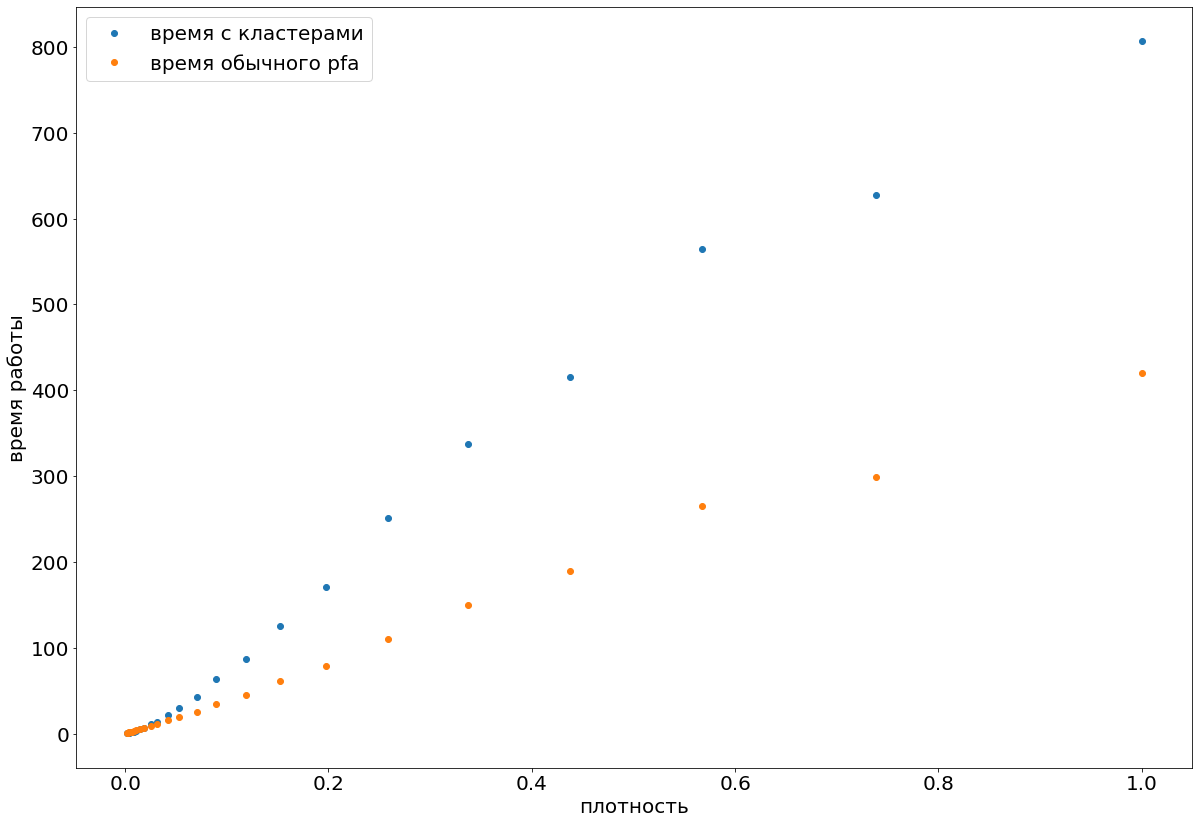

In [2397]:
plt.rcParams.update({'font.size': 20})

fig, axs = plt.subplots(1, 1)
fig.set_figwidth(20)
fig.set_figheight(7*2)

axs.errorbar(X_betta, np.array(Y_time), fmt='o', label = 'время с кластерами')
axs.errorbar(X_betta, Y_time_usual, fmt='o', label = 'время обычного pfa')
axs.set(xlabel='плотность', ylabel='время работы')

axs.legend()

# axs[2].set(xlabel='плотность', ylabel='ошибка')
# axs[2].errorbar(x,Y_betta_err[:M:1], fmt = 'o', alpha = 0.5)
# axs[2].boxplot(data, labels = label)

fig.patch.set_alpha(1)
plt.show()

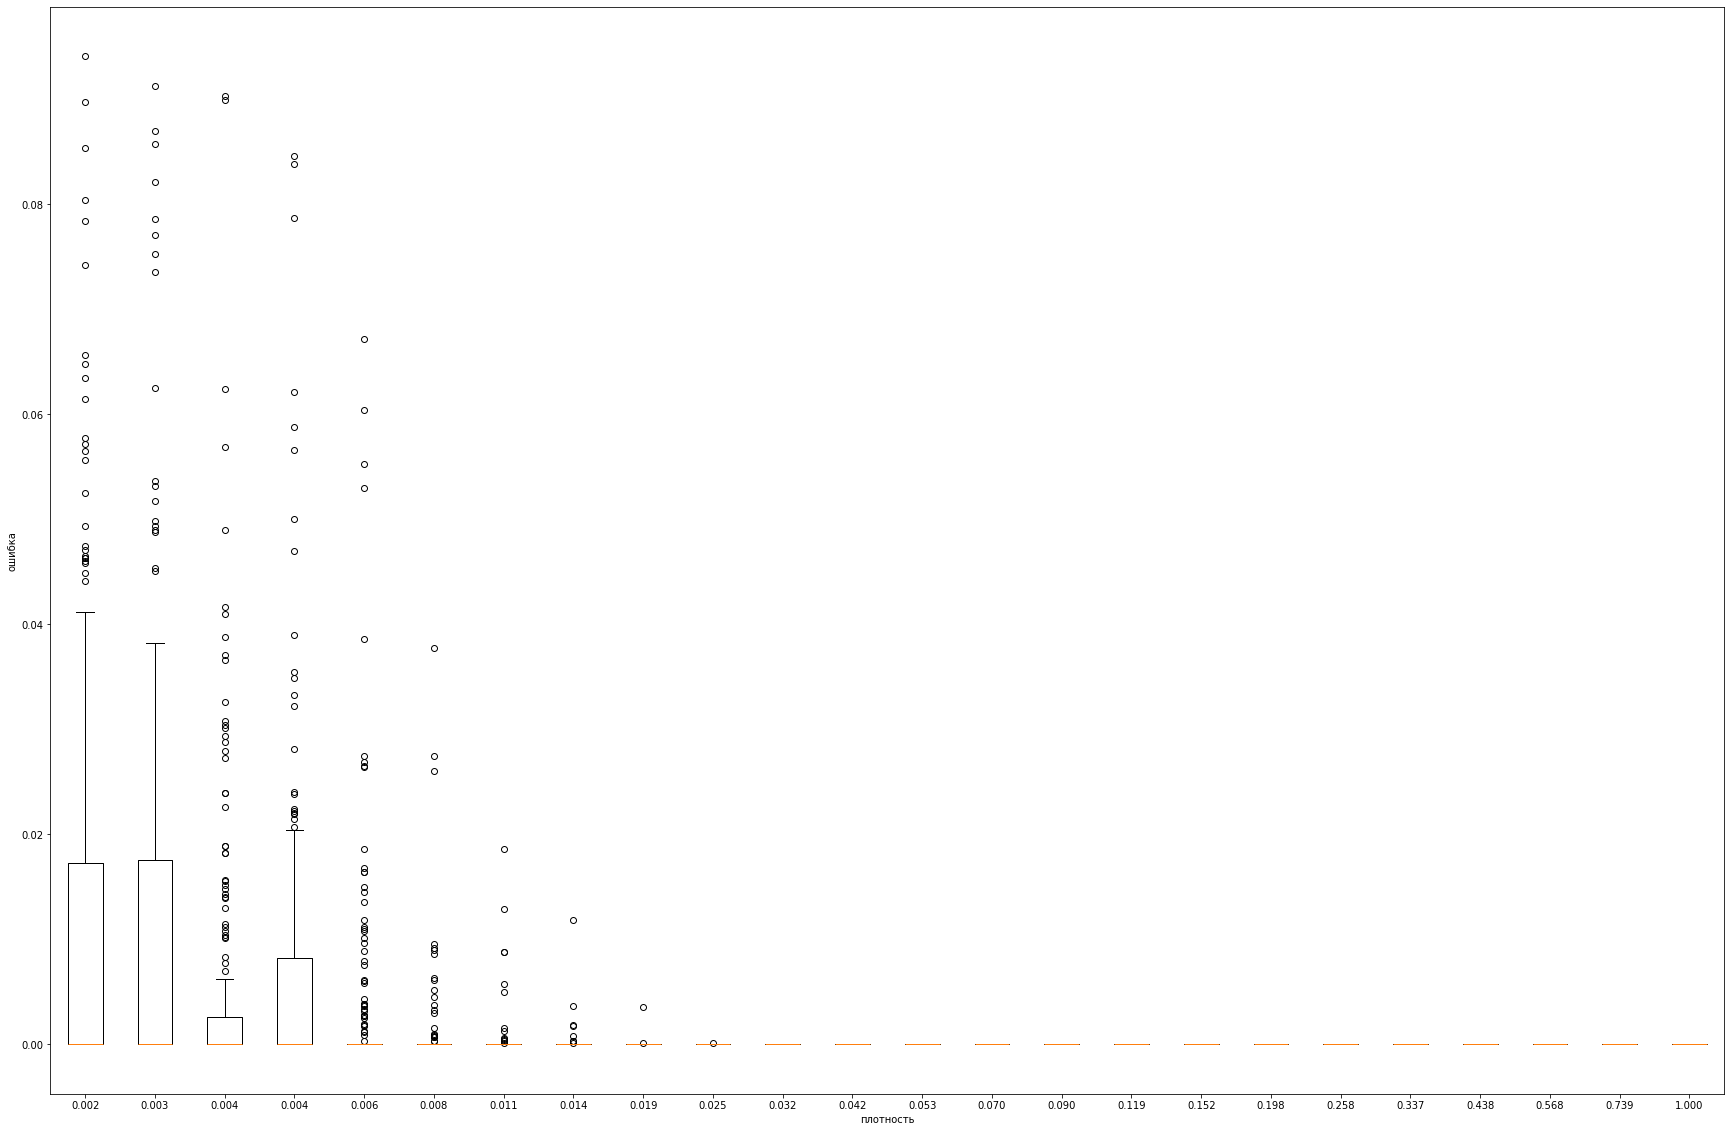

In [2398]:
plt.rcParams.update({'font.size': 10})
data = []
label = []
M = len(Y_betta_err)
STEP = 1
for i in range(0,M,STEP):
    # print(X_betta[i])

    # if i == 9:
        # for name in r:
        #     if r[name].density == X_betta[i]:
        #         print(r[name].points_results[0].absolute_err)
        #         print(np.array(r[name].points_results[0].absolute_err) /np.array(r[name].points_results[0].errors) )

    data.append(Y_errors[i][Y_errors[i] <0.1])
    label.append('{:.3f}'.format(X_betta[i]))
x = [i/STEP + 1 for i in  range(0,M, 1)]
fig, axs = plt.subplots(1, 1)
fig.set_figwidth(30)
fig.set_figheight(20)
Y_betta_err = Y_betta_err[Y_betta_err < 150]
axs.set(xlabel='плотность', ylabel='ошибка')
# axs.errorbar(x,Y_betta_err[:M:1], fmt = 'o', alpha = 0.5)
axs.boxplot(data, labels = label)

fig.patch.set_alpha(1)
plt.show()

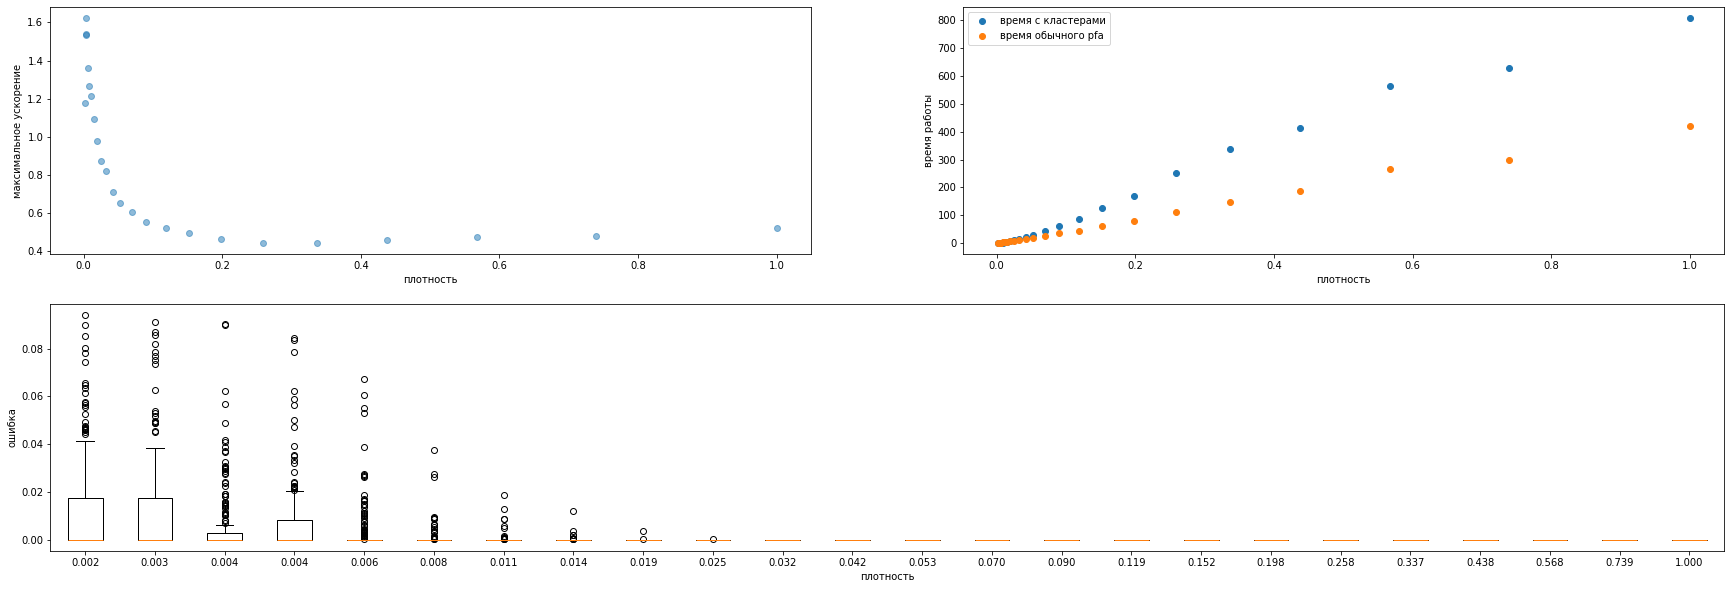

In [2399]:
fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(10)

gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

ax1.errorbar(X_betta, Y_betta_speedup, fmt='o', alpha = 0.5)
# axs.boxplot(data_speed_up, labels = ['{:.2f}'.format(speedup_statistic[n].density) for n in speedup_statistic])
ax1.set(xlabel='плотность', ylabel='максимальное ускорение')


ax2.errorbar(X_betta, np.array(Y_time), fmt='o', label = 'время с кластерами')
ax2.errorbar(X_betta, Y_time_usual, fmt='o', label = 'время обычного pfa')
ax2.set(xlabel='плотность', ylabel='время работы')
ax2.legend()

ax3.set(xlabel='плотность', ylabel='ошибка')
ax3.boxplot(data, labels = label)


fig.patch.set_alpha(1)
plt.show()

In [2400]:
X_betta

array([0.00187594, 0.00298799, 0.00408254, 0.00408254, 0.00627214,
       0.00842371, 0.01055428, 0.01436268, 0.01865133, 0.02518809,
       0.03165133, 0.04202051, 0.05297799, 0.07018809, 0.08964332,
       0.1185983 , 0.15198849, 0.19789995, 0.25842771, 0.33694447,
       0.4376073 , 0.56773937, 0.73871136, 0.99991896])

In [2401]:
print([r[name].points_results[0].alpha for name in r])

[0.2, 0.2, 0.1995, 0.2, 0.2005, 0.197, 0.2, 0.1995, 0.197, 0.2005, 0.1975, 0.207, 0.2005, 0.203, 0.2, 0.2005, 0.204, 0.2005, 0.2005, 0.2005, 0.1995, 0.2, 0.2, 0.2]


[[0.00000000e+00 8.97300434e-02 6.48147015e-02 ... 0.00000000e+00
  7.02235693e-03 5.64817283e-02]
 [1.63689755e-02 1.87178862e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.01669294e-02 0.00000000e+00 5.68499400e-02 ... 0.00000000e+00
  0.00000000e+00 9.11999864e-06]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[0.00000000e+00 8.97300434e-02 6.48147015e-02 ... 0.00000000e+00
  7.02235693e-03 5.64817283e-02]
 [1.63689755e-02 1.87178862e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.01669294e-02 0.00000000e+00 5.68499400e-02 ... 0.00000000e+00
  0.00000000e+00 9.11999864e-06]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]

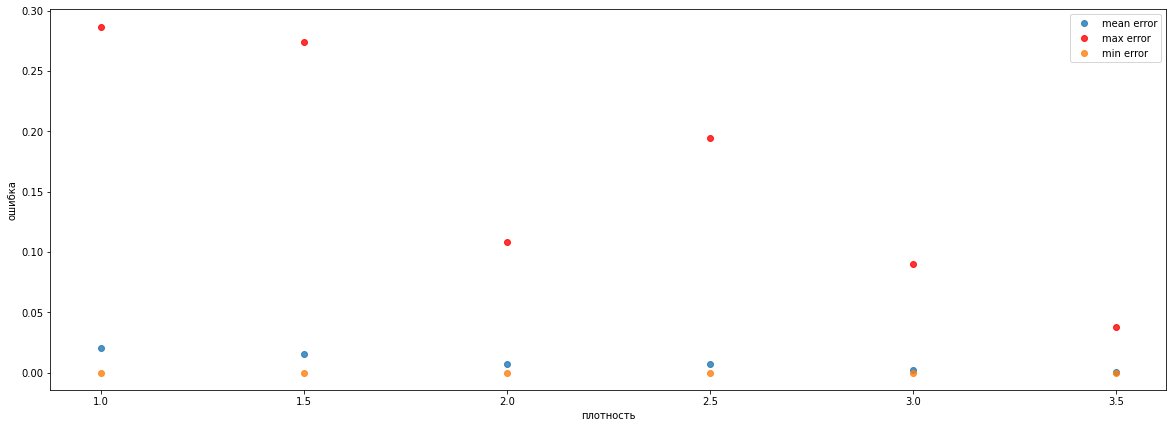

In [2402]:
data = []
label = []
M = len(Y_betta_err) //4
STEP = 2
for i in range(0,M,STEP):
    print(Y_errors)
    data.append(Y_errors[i])
    label.append('{:.2f}'.format(X_betta[i]))
x = [i/2 + 1 for i in  range(0,M, 1)]
fig, axs = plt.subplots(1, 1)
fig.set_figwidth(20)
fig.set_figheight(7)

# axs.boxplot(data, labels = label)
axs.set(xlabel='плотность', ylabel='ошибка')
axs.errorbar(x,np.array([np.mean(r[name].points_results[0].errors) for name in r])[indexes][:M:1], fmt = 'o', alpha = 0.8, label = 'mean error')
axs.errorbar(x,np.array([np.max(r[name].points_results[0].errors) for name in r])[indexes][:M:1], fmt = 'o', alpha = 0.8, label = 'max error', c = 'r')
axs.errorbar(x,np.array([np.min(r[name].points_results[0].errors) for name in r])[indexes][:M:1], fmt = 'o', alpha = 0.8, label = 'min error')

axs.legend()
fig.patch.set_alpha(1)
plt.show()

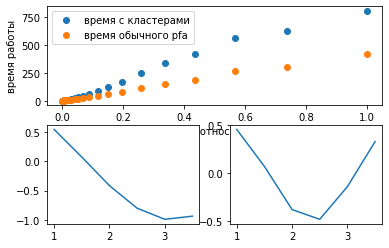

In [2403]:
axs = plt.subplot(2, 1, 1)
axs.errorbar(X_betta, np.array(Y_time), fmt='o', label = 'время с кластерами')
axs.errorbar(X_betta, Y_time_usual, fmt='o', label = 'время обычного pfa')
axs.set(xlabel='плотность', ylabel='время работы')
axs.patch.set_alpha(1)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x, np.cos(x))

plt.subplot(2, 2, 4)
plt.plot(x, np.sin(x)*np.cos(x))

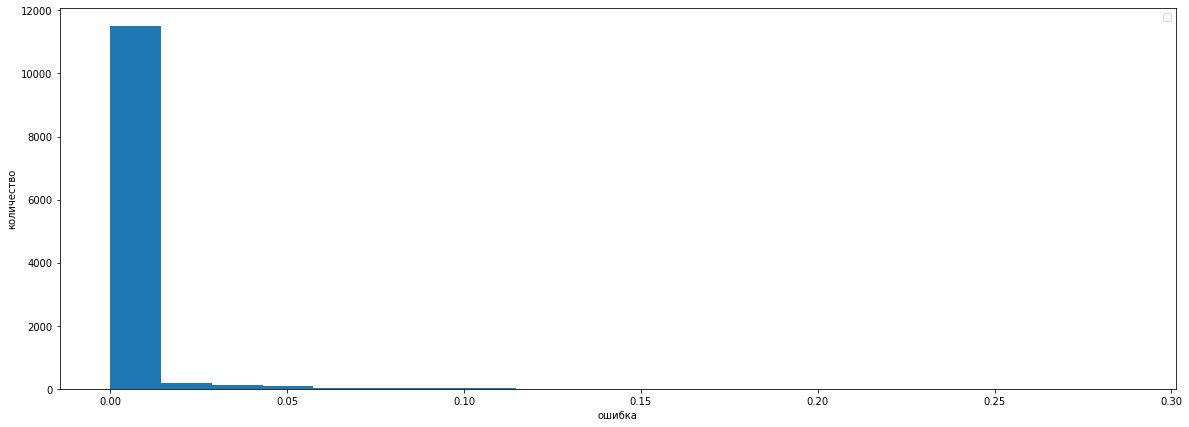

In [2404]:
data = []
label = []
M = len(Y_betta_err) //4
STEP = 2
for i in range(0,M,STEP):
    data.append(Y_errors[i])
    label.append('{:.2f}'.format(X_betta[i]))
x = [i/2 + 1 for i in  range(0,M, 1)]
fig, axs = plt.subplots(1, 1)
fig.set_figwidth(20)
fig.set_figheight(7)

# axs.boxplot(data, labels = label)
axs.set(xlabel='ошибка', ylabel='количество')

axs.hist(np.array([r[name].points_results[0].errors for name in r]).flatten(), bins = 20)
axs.legend()
fig.patch.set_alpha(1)
plt.show()

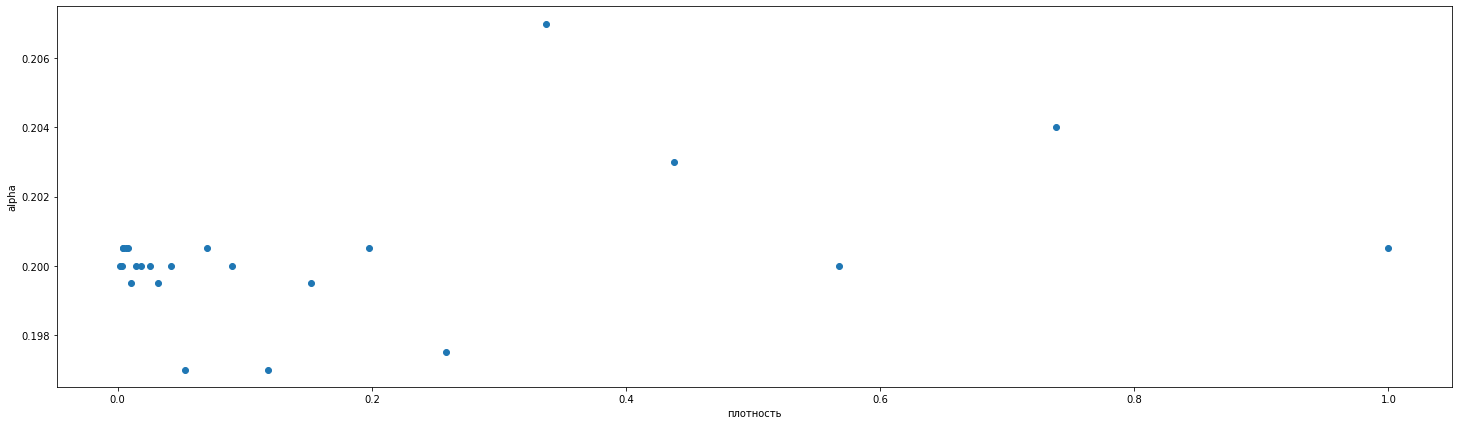

In [2405]:

fig, axs = plt.subplots(1, 1)
fig.set_figwidth(25)
fig.set_figheight(7)

axs.errorbar([r[name].density for name in r], [r[name].points_results[0].alpha for name in r], fmt='o')
axs.set(xlabel='плотность', ylabel='alpha')

fig.patch.set_alpha(1)
plt.show()

Уберем последние 4 точки